Importing Libraries:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import joblib  # Importing joblib to save and load the model



# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codsoft/Task1/titanic.csv')



Data Preprocessing:

Handling Missing Values

In [ ]:
# Handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


Encoding Categorical Variables

In [ ]:

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])



Feature Engineering:

In [ ]:

# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)



Data Splitting:
Split the data into a training set and a testing set.

In [ ]:
# Data splitting
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Imputing Missing Values

In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



Model Building:
we'll use a Random Forest classifier.

In [ ]:
# Model building
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Model Evaluation:
Evaluate the model's performance.

In [ ]:
# Save the trained model to a .pkl file
model_filename = '/content/drive/MyDrive/Colab Notebooks/Codsoft/Task1/titanic_model.pkl'
joblib.dump(clf, model_filename)

# Model evaluation
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Visualization:
Visualize the model's performance and important features.

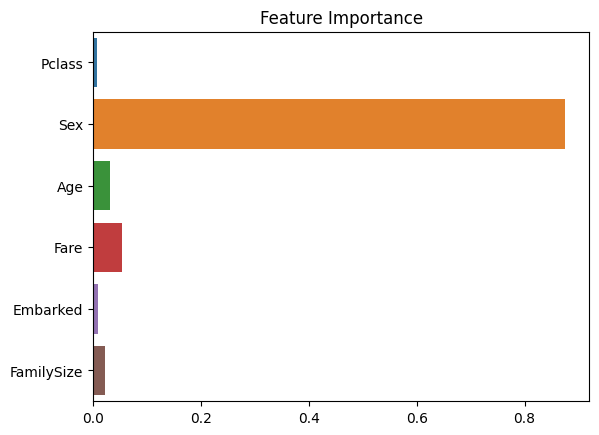

In [ ]:


# Feature importance
feature_importance = clf.feature_importances_
features = X.columns
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import joblib

# Loading the model
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Codsoft/Task1/titanic_model.pkl')

# New data for prediction
new_data = pd.DataFrame({
    'Pclass': [3],
    'Sex': ['male'],
    'Age': [25],
    'Fare': [7.5],
    'Embarked': ['S'],
    'FamilySize': [0]
})

# One-hot encoding for categorical variables in new data
new_data = pd.get_dummies(new_data, columns=['Sex', 'Embarked'], drop_first=True)

original_columns = X.columns
for col in original_columns:
    if col not in new_data.columns:
        new_data[col] = 0

# Reordering the columns to match the order in the training data
new_data = new_data[original_columns]

# Impute missing values for new data
new_data = imputer.transform(new_data)

# Making predictions on new data
new_predictions = loaded_model.predict(new_data)
print(f'Predictions for new data: {new_predictions}')

if new_predictions == 1:
    print("The model predicts that this individual is likely to survive.")
else:
    print("The model predicts that this individual is not likely to survive.")

Predictions for new data: [1]
The model predicts that this individual is likely to survive.
